In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\ML-Data-Sets\Customer-Churn-Prediction.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

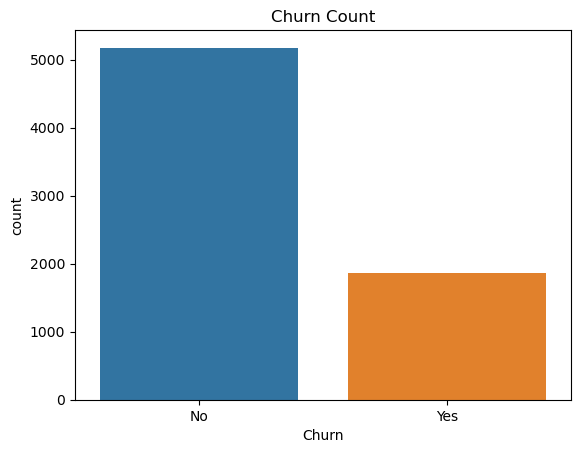

In [4]:
#sns.countplot(df["Churn"])
# Convert the "Churn" column to a categorical type
df['Churn'] = df['Churn'].astype('category')

# Plot the countplot
sns.countplot(x="Churn", data=df)
plt.title("Churn Count")
plt.show()


In [5]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
churned = df[df.Churn == "Yes"].shape[0]
retained = df[df.Churn == "No"].shape[0]

In [7]:
ch_per = ((churned/(churned+retained))*100)
ch_per

26.536987079369588

In [8]:
re_per = ((retained/(churned+retained))*100)
re_per

73.4630129206304

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162289,32.370865,64.761692
std,0.368742,24.559231,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


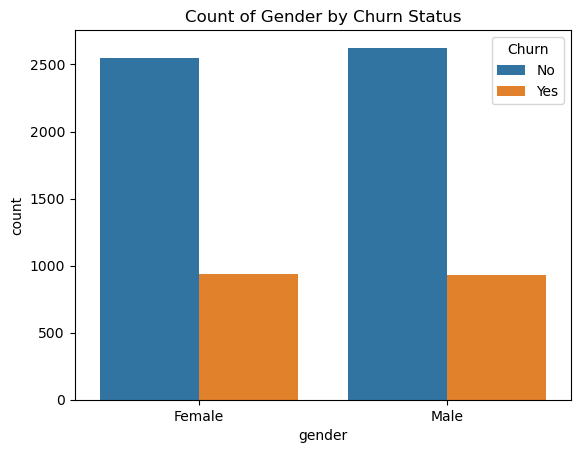

In [11]:
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Count of Gender by Churn Status")
plt.show()

In [12]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

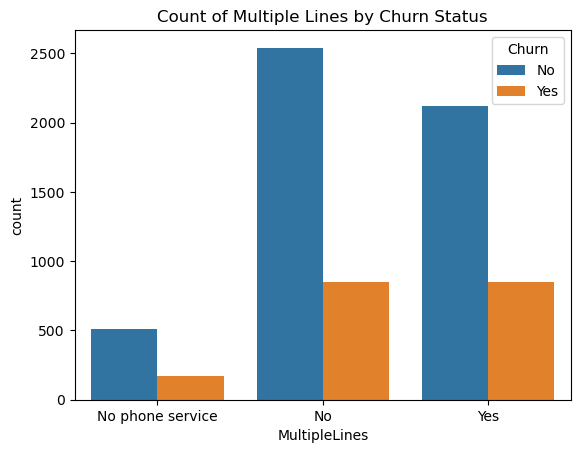

In [13]:
sns.countplot(x="MultipleLines", hue="Churn", data=df)
plt.title("Count of Multiple Lines by Churn Status")
plt.show()

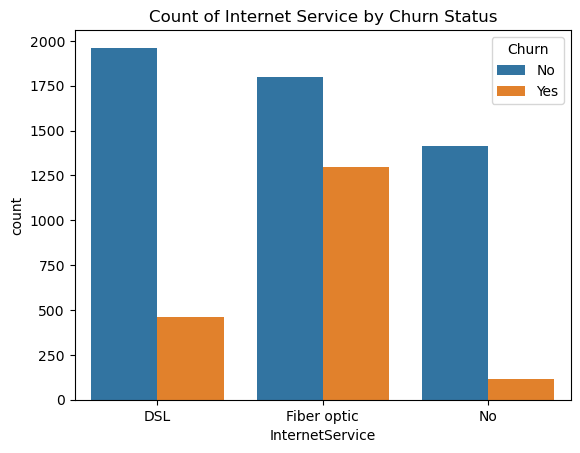

In [14]:
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Count of Internet Service by Churn Status")
plt.show()


In [15]:
df = df.drop("customerID", axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [16]:
df.shape

(7043, 20)

In [44]:
from sklearn.preprocessing import LabelEncoder

In [64]:
label_encoder = LabelEncoder()
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        continue  
    df[column] = label_encoder.fit_transform(df[column])

In [65]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_encoded
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,2505,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1466,0,0
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,157,1,1
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1400,0,0
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,925,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,2,2,1,1,3,84.80,1597,0,0
7039,0,0,1,1,72,1,2,1,0,2,...,0,2,2,1,1,1,103.20,5698,0,0
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,0,0,1,2,29.60,2994,0,0
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,0,0,1,3,74.40,2660,1,1


In [66]:
x = df.drop('Churn', axis=1)
y = df[["Churn"]]
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


# Scalling the data set

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
feature_x = StandardScaler().fit_transform(x)

In [69]:
feature_x

array([[-1.00955867, -0.44014635,  1.03453023, ..., -1.16032292,
        -0.39860759, -0.60102348],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -0.25962894,
        -0.94876238, -0.60102348],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -0.36266036,
        -1.64188328,  1.66382851],
       ...,
       [-1.00955867, -0.44014635,  1.03453023, ..., -1.1686319 ,
        -0.13968008, -0.60102348],
       [ 0.99053183,  2.27197156,  1.03453023, ...,  0.32033821,
        -0.31653445,  1.66382851],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.35896134,
         1.13801338, -0.60102348]])

# Split data set

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(feature_x,y,test_size=.25,random_state=42)

In [71]:
x_test

array([[-1.00955867, -0.44014635,  1.03453023, ..., -1.32816441,
        -0.642709  ,  1.66382851],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -1.31320824,
         1.72841048, -0.60102348],
       [-1.00955867, -0.44014635,  1.03453023, ..., -1.50930029,
        -1.68953865, -0.60102348],
       ...,
       [ 0.99053183, -0.44014635, -0.96662231, ...,  0.20401242,
        -0.89369395, -0.60102348],
       [-1.00955867, -0.44014635, -0.96662231, ..., -0.99912861,
         0.94421487,  1.66382851],
       [-1.00955867,  2.27197156, -0.96662231, ...,  0.30039665,
         0.08588868, -0.60102348]])

# Build Logistic Regression model

In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [73]:
model.fit(x_train,y_train)

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [74]:
pred = model.predict(x_test)
pred

array([1, 0, 0, ..., 0, 1, 0])

In [75]:
pred.shape

(1761,)

# Performance Matrix

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [77]:
accuracy_score(y_test,pred)

1.0

In [78]:
#from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y_test,pred)

array([[1282,    0],
       [   0,  479]], dtype=int64)

In [80]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1282
           1       1.00      1.00      1.00       479

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

